log normal distribution
--


If the logarithms of a set of values have a normal distribution, the values
have a lognormal distribution.

The CDF of the lognormal distribution is
the same as the CDF of the normal distribution, with log x substituted for
x.

CDFlognormal(x) = CDFnormal(log x)

The parameters of the lognormal distribution are usually denoted µ and
σ. But remember that these parameters are not the mean and standard
deviation; the mean of a lognormal distribution is exp(µ + σ2=2) and the
standard deviation is ugly (see http://wikipedia.org/wiki/Log-normal_
distribution)

data we will using:

The National Center for Chronic Disease Prevention and Health Promotion
conducts an annual survey as part of the Behavioral Risk Factor Surveillance
System (BRFSS). they interviewed 414,509 respondents and asked
about their demographics, health, and health risks. Among the data they
collected are the weights in kilograms of 398,484 respondents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

In [2]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv('brfss.csv')

In [3]:
df.head()

,Unnamed: 0,age,sex,wtyrago,finalwt,wtkg2,htm3
0,0,82.0,2,76.363636,185.870345,70.91,157.0
1,1,65.0,2,72.727273,126.603027,72.73,163.0
2,2,48.0,2,NaN,181.063210,NaN,165.0
3,3,61.0,1,73.636364,517.926275,73.64,170.0
4,4,26.0,1,88.636364,1252.624630,88.64,185.0


In [4]:
df = df.dropna()

In [5]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

def fitLine(series):
    mean=np.mean(series)
    std = np.std(series)
    lim = [-4,4]
    y = [std*x+mean for x in lim]
    return lim,y

In [6]:
# plot the cdf one in linear scale and other in log scale
wgts = df['wtkg2']
x,y = compute_cdf(df['wtkg2'].values)

In [7]:
# find cdf(logx)
import math
log_x = [math.log(val) for val in x]
x1,y1 = compute_cdf(log_x)

In [8]:
def norm_cdf(x):
    
    size= len(x)
    mean = np.mean(x)
    std = np.std(x)
    
    z_values = np.linspace(norm.ppf(0.0001,loc=mean,scale=std),norm.ppf(0.9999,loc=mean,scale=std),size)
    return z_values,[norm.cdf(x,loc=mean,scale=std) for x in z_values]

x_norm, cdf_norm = norm_cdf(x)
x_log_norm,cdf_log_norm = norm_cdf(log_x)

Text(0.5,0,'log(x)')

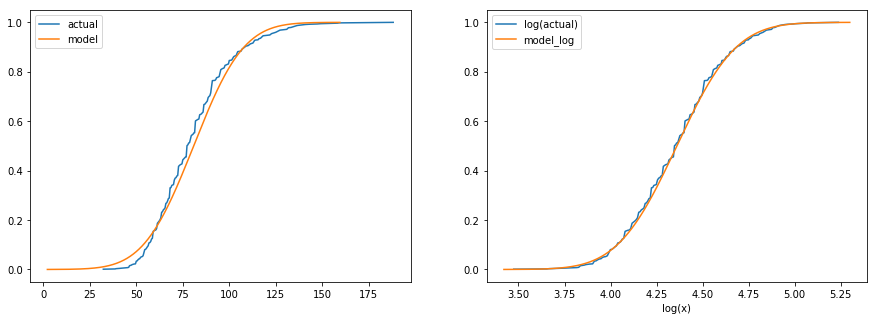

In [9]:
# plot the cdf of actual distribution and normal distribution
fig0,(ax0,ax1) = plt.subplots(ncols=2)
fig0.set_size_inches(15,5)
ax0.plot(x,y,label='actual')
ax0.plot(x_norm,cdf_norm,label='model')
ax1.plot(x1,y1,label='log(actual)')
ax1.plot(x_log_norm,cdf_log_norm,label='model_log')
ax0.legend()
ax1.legend()
ax1.set_xlabel('log(x)')

figure shows the same distribution on a log
scale with a lognormal model. The lognormal model is a better fit, but this
representation of the data does not make the difference particularly dramatic

Normal probability plot for the distribution
---

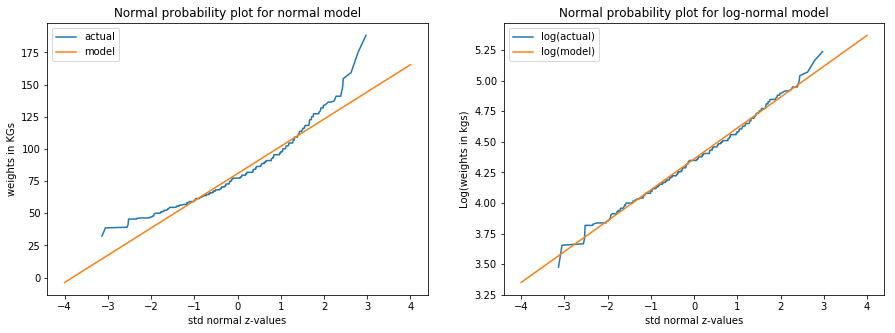

In [10]:
# generate random numbers from standard normal distribution

std_z_values = sorted(np.random.randn(len(x)))
 
fig1,(ax2,ax3) = plt.subplots(ncols=2)
fig1.set_size_inches(15,5)

lim,y = fitLine(x)
lim,y2 = fitLine(x1)

ax2.set_title('Normal probability plot for normal model')
ax3.set_title('Normal probability plot for log-normal model')

ax2.plot(std_z_values,x,label='actual')
ax2.plot(lim,y,label='model')

ax3.plot(std_z_values,x1,label='log(actual)')
ax3.plot(lim,y2,label='log(model)')

ax2.set_xlabel('std normal z-values')
ax3.set_xlabel('std normal z-values')

ax2.set_ylabel('weights in KGs')
ax3.set_ylabel('Log(weights in kgs)')

ax2.legend()
ax3.legend()

Figure shows normal probability plots for adult weights, w, and for their
logarithms, log10 w. Now it is apparent that the data deviate substantially
from the normal model. On the other hand, the lognormal model is a good
match for the data.